In [4]:
#Ultrarelativistic Travel vs FTL
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def distance_newton(a,t):
    t_sec = t*3.154*10**7
    a_ms = a * 9.80665
    
    d_metre = 0.5*a_ms*t_sec**2
    
    d_ly = d_metre/(9.461*10**15)
    return d_ly

def distance_einstein(a,t):
    t = t*3.154*10**7
    a = a * 9.80665
    c = 299792458


    fact = np.cosh((a*t)/c)
    
    d_metre = ((c**2)/a)*(fact-1)
    
    d_ly = d_metre/(9.461*10**15)
    return d_ly

100%|██████████| 1000/1000 [00:00<00:00, 66716.04it/s]


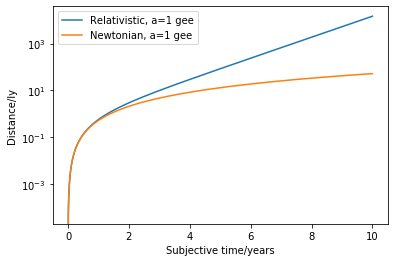

In [34]:
einstein,newton = [],[]

max = 10
trange = np.linspace(0,max,1000)

a = 1

for t in tqdm(trange):
    einstein.append(distance_einstein(a,t))
    newton.append(distance_newton(a,t))

plt.plot(trange,einstein,label='Relativistic, a={} gee'.format(a))
plt.plot(trange,newton,label='Newtonian, a={} gee'.format(a))
plt.xlabel("Subjective time/years")
plt.ylabel("Distance/ly")
plt.yscale('log')

plt.legend()

In [28]:
print(distance_einstein(1.01971621298,20)/(1e6))

652.7719177838868


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


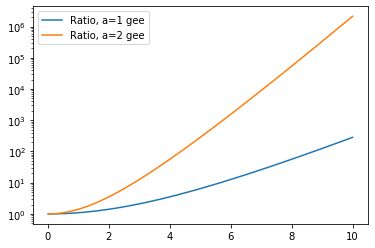

In [45]:
max = 10
trange = np.linspace(0,max,1000)
for a in [1,2]:
    def ratio(a,t):
        rati = distance_einstein(a,t)/distance_newton(a,t)
        return rati

    rat = []

    for t in trange:
        rat.append(ratio(a,t))

    plt.plot(trange,rat,label='Ratio, a={} gee'.format(a))
plt.legend()
plt.yscale('log')


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


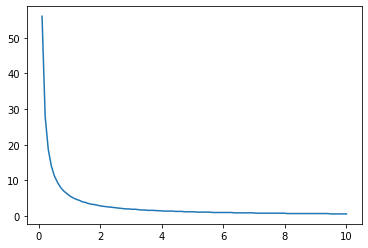

In [46]:
def exceed10(a):
    trange = np.linspace(0,100,1000)
    for t in trange:
        if ratio(a,t)>10:
            return t

accrange = np.linspace(0,10,100)
exceedtimes = []
for a in accrange:
    exceedtimes.append(exceed10(a))

plt.plot(accrange,exceedtimes)
plt.title("Time for Relativistic ship to exceed 10x distance of newtonian ship at x gee")